In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("data\Rport.csv")
df['Data'] = df['Data'].astype('datetime64[ns]')

In [4]:
df.describe()

,Equal Weights,HRP,MV
count,210.000000,210.000000,210.000000
mean,1.421487,1.153132,0.994879
std,7.158521,5.653732,5.100198
min,-31.222129,-24.552510,-19.159562
25%,-2.432378,-1.520388,-1.834484
50%,1.165318,0.971418,0.553035
75%,5.850250,5.104367,4.923248
max,28.407488,17.612941,17.813332


In [5]:
df

,Data,Equal Weights,HRP,MV
0,2005-01-01,-5.768847,-4.420817,-2.355550
1,2005-02-01,14.548543,12.923189,10.937546
2,2005-03-01,-6.405159,-6.251613,-5.384795
3,2005-04-01,-6.622281,-9.624687,-15.582348
4,2005-05-01,4.035351,3.453695,3.275437
...,...,...,...,...
205,2022-02-01,-2.031817,-0.608951,2.046017
206,2022-03-01,5.703848,6.404985,6.320585
207,2022-04-01,-6.545801,-5.243801,-5.107131
208,2022-05-01,5.022972,2.550641,1.081142


In [6]:
display(df['Equal Weights'].sum())
display(df['HRP'].sum())
display(df['MV'].sum())

298.51226902264176

242.15768557480027

208.92450138265377

In [7]:
sns.set(rc = {'figure.figsize':(30,8)})

<AxesSubplot: xlabel='Data', ylabel='value'>

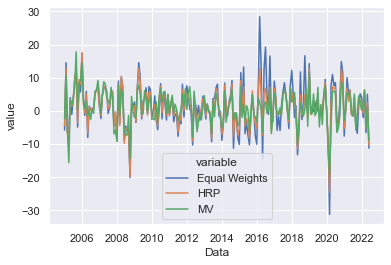

In [8]:
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(df, ['Data']))

###### Adicionar linhas verticais de marcos históricos
- crash dos bancos em 2008
- impeachment 2015
- eleições de 2018
- início da pandemia 2020
- janelas também para 120 meses

### Pandemic Window

<AxesSubplot: xlabel='Data', ylabel='value'>

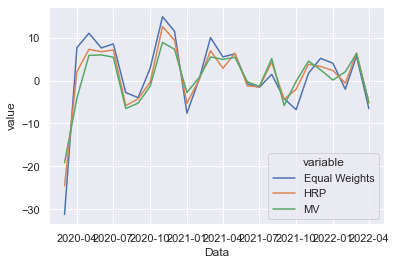

In [9]:
pandemic_df = df.loc[(df['Data'] >= '2020-03-01') & (df['Data'] < '2022-04-15')]
sns.lineplot(x='Data', y='value', hue='variable', 
             data=pd.melt(pandemic_df, ['Data']))


In [10]:
df['Ano'] = df['Data'].astype('datetime64[ns]')
df['Ano'] = df['Data'].dt.year.astype(int)

In [11]:
df_mean_by_year = df.groupby(['Ano'], as_index=False).mean()
df_median_by_year = df.groupby(['Ano'], as_index=False).median()
df_std_by_year = df.groupby(['Ano'], as_index=False).std()

# AV

<AxesSubplot: xlabel='Ano', ylabel='value'>

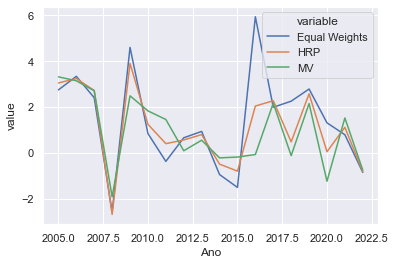

In [12]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_mean_by_year, ['Ano']))


# AV Median

<AxesSubplot: xlabel='Ano', ylabel='value'>

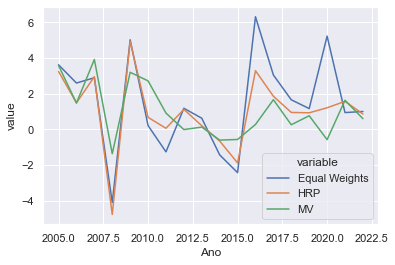

In [13]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_median_by_year, ['Ano']))


# SD

<AxesSubplot: xlabel='Ano', ylabel='value'>

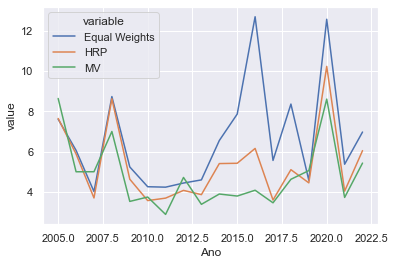

In [14]:
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_std_by_year, ['Ano']))


#### Esse está correto ou seria o de cima?

<AxesSubplot: xlabel='Ano', ylabel='value'>

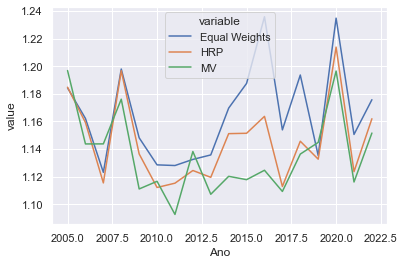

In [15]:
df_std_by_year['Equal Weights'] = df_std_by_year['Equal Weights'].pow(1/12)
df_std_by_year['HRP'] = df_std_by_year['HRP'].pow(1/12)
df_std_by_year['MV'] = df_std_by_year['MV'].pow(1/12)
sns.lineplot(x='Ano', y='value', hue='variable', 
             data=pd.melt(df_std_by_year, ['Ano']))

In [16]:
cdi = pd.read_csv("data\CDI.csv", sep = ";")
cdi

,Ano,Mês,Value,Data,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2022,Jan,"0,007323",2022-01-01,NaN,NaN,NaN,NaN,NaN
1,2022,Fev,"0,00755",2022-02-01,NaN,NaN,NaN,NaN,NaN
2,2022,Mar,"0,009271",2022-03-01,NaN,NaN,NaN,NaN,NaN
3,2022,Abr,"0,008343",2022-04-01,NaN,NaN,NaN,NaN,NaN
4,2022,Mai,"0,010346",2022-05-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
439,1986,Ago,"0,028955",1986-08-01,NaN,NaN,NaN,NaN,NaN
440,1986,Set,"0,033009",1986-09-01,NaN,NaN,NaN,NaN,NaN
441,1986,Out,"0,034549",1986-10-01,NaN,NaN,NaN,NaN,NaN
442,1986,Nov,"0,052199",1986-11-01,NaN,NaN,NaN,NaN,NaN


In [17]:
cdi.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], inplace=True)

In [18]:
cdi.rename(columns={'Value': 'CDI'}, inplace=True)
cdi['Data'] = cdi['Data'].astype('datetime64[ns]')

In [19]:
df_merged = pd.merge(df, cdi, on='Data', how='inner')
df_merged.drop(columns=['Ano_x'], inplace=True)
df_merged.rename(columns={'Ano_y': 'Ano'})
df_merged.replace(',', '.', regex=True, inplace=True)
df_merged['CDI'] = df_merged['CDI'].astype(float)
df_merged['CDI'] = df_merged['CDI']*100
df_merged

,Data,Equal Weights,HRP,MV,Ano_y,Mês,CDI
0,2005-01-01,-5.768847,-4.420817,-2.355550,2005,Jan,1.3828
1,2005-02-01,14.548543,12.923189,10.937546,2005,Fev,1.2159
2,2005-03-01,-6.405159,-6.251613,-5.384795,2005,Mar,1.5220
3,2005-04-01,-6.622281,-9.624687,-15.582348,2005,Abr,1.4080
4,2005-05-01,4.035351,3.453695,3.275437,2005,Mai,1.5004
...,...,...,...,...,...,...,...
205,2022-02-01,-2.031817,-0.608951,2.046017,2022,Fev,0.7550
206,2022-03-01,5.703848,6.404985,6.320585,2022,Mar,0.9271
207,2022-04-01,-6.545801,-5.243801,-5.107131,2022,Abr,0.8343
208,2022-05-01,5.022972,2.550641,1.081142,2022,Mai,1.0346


# SR / ASR

In [26]:
from math import sqrt

df['excess_returns'] = df['Equal Weights'] - 0.005
mean_excess_returns = df['excess_returns'].mean()

# Calculate the standard deviation of the excess returns
std_excess_returns = df['excess_returns'].std()

# Calculate the Sharpe ratio
sharpe_ratio = mean_excess_returns / std_excess_returns

# Calculate the annualized Sharpe ratio
annualized_sharpe = sqrt(12) * sharpe_ratio

print(annualized_sharpe)


0.6854565411334193


In [36]:
import pandas as pd
import math

def annualized_sharpe(df, col):
  df['excess_returns'] = df[col] - 0.005

  # Calculate the average excess returns
  mean_excess_returns = df['excess_returns'].mean()

  # Calculate the standard deviation of the excess returns
  std_excess_returns = df['excess_returns'].std()

  # Calculate the Sharpe ratio
  sharpe_ratio = mean_excess_returns / std_excess_returns

  # Calculate the annualized Sharpe ratio
  annualized_sharpe = sqrt(12) * sharpe_ratio

  return annualized_sharpe


In [38]:
# Specify the list of columns to include in the loop
columns = ['Equal Weights', 'HRP', 'MV']
sr_df = pd.DataFrame(columns=['Portfolio', 'Annualized Sharpe'])

# Calculate the annualized Sharpe ratio for each column
for col in columns:
  sharpe = annualized_sharpe(df, col)
  row = {'Portfolio': col, 'Annualized Sharpe': sharpe}
  sr_df = sr_df.append(row, ignore_index=True)

sr_df

C:\Users\felip\AppData\Local\Temp\ipykernel_3208\2913147066.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_3208\2913147066.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_3208\2913147066.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sr_df = sr_df.append(row, ignore_index=True)


,Portfolio,Annualized Sharpe
0,Equal Weights,0.685457
1,HRP,0.703473
2,MV,0.672335


# SoR

In [39]:
def annualized_sortino(df, col, mar):
  df['excess_returns'] = df[col] - mar
  mean_excess_returns = df['excess_returns'].mean()
  std_negative_excess_returns = df[df['excess_returns'] < 0]['excess_returns'].std()
  sortino_ratio = mean_excess_returns / std_negative_excess_returns
  annualized_sortino = sqrt(12) * sortino_ratio

  return annualized_sortino


In [41]:
sortino_df = pd.DataFrame(columns=['Portfolio', 'Annualized Sortino'])

mar = 0.005
columns = ['Equal Weights', 'HRP', 'MV']

# Calculate the annualized Sortino ratio for each column
for col in columns:
    sortino = annualized_sortino(df, col, mar)
    row = {'Portfolio': col, 'Annualized Sortino': sortino}
    sortino_df = sortino_df.append(row, ignore_index=True)

sortino_df


C:\Users\felip\AppData\Local\Temp\ipykernel_3208\2168447903.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_3208\2168447903.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_3208\2168447903.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sortino_df = sortino_df.append(row, ignore_index=True)


,Portfolio,Annualized Sortino
0,Equal Weights,1.038159
1,HRP,0.977556
2,MV,0.965796


# TO

In [42]:
def average_portfolio_turnover(df, col):
  # Calculate the absolute difference between the current and previous weights
  df['weight_diff'] = (df[col] - df[col].shift()).abs()

  # Calculate the average portfolio turnover
  avg_turnover = df['weight_diff'].mean()

  return avg_turnover


In [43]:
turnover_df = pd.DataFrame(columns=['Portfolio', 'Average Turnover'])
columns = ['Equal Weights', 'HRP', 'MV']

for col in columns:
    turnover = average_portfolio_turnover(df, col)
    # Create a new row with the column name and the average portfolio turnover
    row = {'Portfolio': col, 'Average Turnover': turnover}
    # Append the row to the results DataFrame
    turnover_df = turnover_df.append(row, ignore_index=True)
turnover_df


C:\Users\felip\AppData\Local\Temp\ipykernel_3208\1650016398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_3208\1650016398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_3208\1650016398.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  turnover_df = turnover_df.append(row, ignore_index=True)


,Portfolio,Average Turnover
0,Equal Weights,7.162740
1,HRP,5.672352
2,MV,5.087235
